# This file is used for testing of code snippet for Corn detection

Use this file for checking all the dependencies and setup of project.
Use this file for testing a model on individual image.

In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import Counter


# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

#import corn class
import corn_2class
%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

#Load both class data config
CORN_DIR = os.path.join(ROOT_DIR, "datasets/corn")

config_2class= corn_2class.CornConfig()
class InferenceConfig(config_2class.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.8
config_2class = InferenceConfig()

config_2class.display()

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# Load validation/test dataset
dataset_2class = corn_2class.CornDataset()
dataset_2class.load_corn(CORN_DIR, "test")
dataset_2class.prepare()
print("Images: {}\nClasses: {}".format(len(dataset_2class.image_ids), dataset_2class.class_names))


# Create model in inference mode
with tf.device("/cpu:0"):
    
    model_2class = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config_2class)


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 0.7, 'rpn_bbox_loss': 0.7, 'mrcnn_class_loss': 0.9, 'mrcnn_bbox_loss': 0.9, 'mrcnn_mask_loss': 0.7}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [5]:
# Set path to corn weights file
weights_path_2class = "C:/Users/shrin/Documents/GitHub/Corn_Detection/logs/appr1/2class_250im_600ep/mask_rcnn_corn_2class_250_6.h5"

# Load weights
print("Loading weights ", weights_path_2class)
model_2class.load_weights(weights_path_2class, by_name=True)

Loading weights  C:/Users/shrin/Documents/GitHub/Corn_Detection/logs/appr1/2class_250im_600ep/mask_rcnn_corn_2class_250_6.h5


Processing 1 images
image                    shape: (2988, 5312, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 5312.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


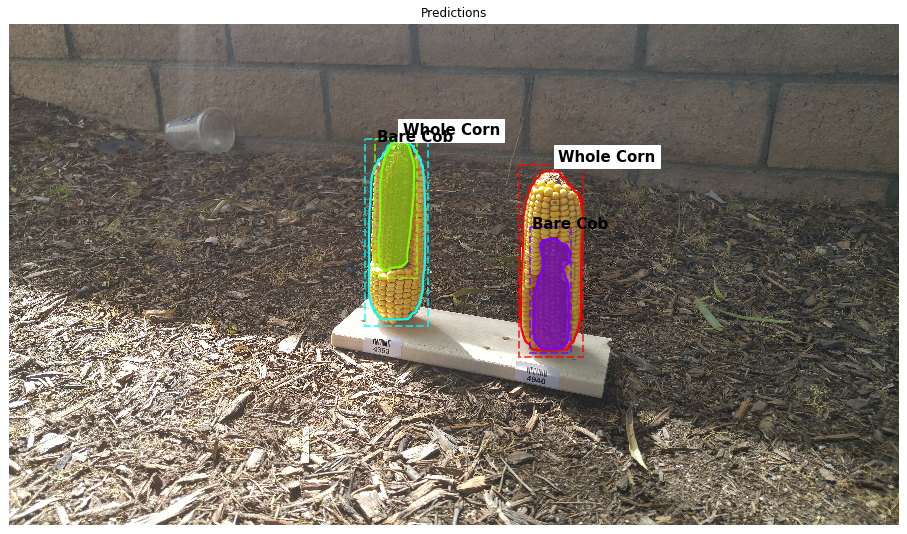

In [8]:
import skimage.io
#image = skimage.io.imread(os.path.join(ROOT_DIR, "datasets/corn/val/1197_2_00500_01637_image.JPG"))
#Left bare corn- 2068_2_00578_01783_IMG_7242
image = skimage.io.imread("C:/Users/shrin/Documents/GitHub/Corn_Detection\\datasets\\corn\\newTest\\1523-2b.JPG")

results_2class = model_2class.detect([image], verbose=1)
ax2 = get_ax(rows=1)
r2 = results_2class[0]
visualize.display_instances(image, r2['rois'], r2['masks'], r2['class_ids'], 
                            ['BG', 'Corn', 'Bare Cob'], r2['scores'], ax=ax2,
                            title="Predictions")
# Use this to save the image with filename
#visualize.save_image(image, 'filename.jpg', r2['rois'], r2['masks'],
 #   r2['class_ids'],r2['scores'],['BG', 'Corn','Red Corn Kernel'],scores_thresh=0.8,mode=0, show_mask=True)

In [19]:
def get_cornList(r, n_classes) :
    from collections import Counter
    cornList = []
    redCornList=[]
    yellowCornList=[]
    no_of_corns = no_of_red = no_of_yellow = 0
    classes = r['class_ids']
    masks = r['masks']
    regions = r['rois']
    #print(regions)
    #print(classes)
    #print(masks.shape)
    offset = round(((image.shape)[1])*0.075)
    #print('Offset : ',offset)
    class_detected = Counter(classes)
    no_of_corns = class_detected[1]
    if(n_classes == 2) : 
        no_of_red = class_detected[2]
    elif(n_classes == 3) :
        no_of_yellow = class_detected[2]
        no_of_red = class_detected[3]
    #print(no_of_corns, no_of_red, no_of_yellow)
    for index, roi, class_id in zip(range(len(regions)), regions, classes):
        mask = masks[:,:,index]
        if(class_id == 1):
            #print(mask.shape)
            cornList.append({'cornRoi' : roi, 'class_id' : class_id, 'mask' : mask, 'mask_pixels' : (mask.sum()), 'redCorns' : [], 'yellowCorns' : []})
        if(class_id == 2 and n_classes == 2) : 
            redCornList.append({'redCornRoi' : roi, 'class_id' : class_id, 'mask' : mask, 'mask_pixels' : (mask.sum())})
        elif(class_id == 2 and n_classes == 3) :
            yellowCornList.append({'yellowCornRoi' : roi, 'class_id' : class_id, 'mask' : mask, 'mask_pixels' : (mask.sum())})
        if(class_id == 3 and n_classes == 3) : 
            redCornList.append({'redCornRoi' : roi, 'class_id' : class_id, 'mask' : mask, 'mask_pixels' : (mask.sum())})
    redCornIdx = []
    for corn in cornList:
        corn_y1 = corn['cornRoi'][0] - offset
        corn_x1 = corn['cornRoi'][1] - offset
        corn_y2 = corn['cornRoi'][2] + offset
        corn_x2 = corn['cornRoi'][3] + offset
        corn_area = corn['mask_pixels']
        eaten_area = 0
       # print('RedCorns Before : ', corn['redCorns'])
        for redCorn in redCornList:
            if((corn_y1 <= redCorn['redCornRoi'][0]) and (corn_x1 <= redCorn['redCornRoi'][1])
            and (corn_y2 >= redCorn['redCornRoi'][2]) and (corn_x2 >= redCorn['redCornRoi'][3])):
               corn['redCorns'].append(redCorn)
               eaten_area += redCorn['mask_pixels']
               redCornIdx.append(redCorn)
               #redCornList.remove(redCorn)
        percent_eaten = round((eaten_area / corn_area) * 100 , 3)
        corn.update({'percent_eaten' : percent_eaten}) 
        #print('RedCorns After : ', corn['redCorns'])
    #redCornList = [e for e in redCornList if e not in redCornIdx]
    #print('RedCorns After : ', redCornList)
    #print('Final CORNS : \n', cornList)    
    return cornList

In [20]:
def show_final_results(cornList) :
    final_rois = []
    final_masks = []
    final_class = []
    final_percent = []
    for corn, index in zip(cornList, range(len(cornList))) :
        print("Corn number ", index+1, "is  ",corn['percent_eaten'],"% Eaten")
        final_rois.append(corn['cornRoi'])
        final_masks.append(corn['mask'])
        final_class.append(corn['class_id'])
        final_percent.append(corn['percent_eaten'])
    final_rois = np.asarray(final_rois)
    final_masks = np.asarray(final_masks)
    final_class = np.asarray(final_class)
    shape = final_masks.shape
    final_masks.shape = (shape[1], shape[2], shape[0])
#     ax3 = get_ax(1)
#     visualize.display_instances(image, final_rois, final_masks, final_class, 
#                                 ['BG', 'Corn', 'Bare Corn'], final_percent, ax=ax3,
#                                 title="Predictions", show_mask = False, show_bbox = True)

In [21]:
cornList_2class  = get_cornList(r2, 2)
show_final_results(cornList_2class)

Corn number  1 is   42.294 % Eaten
Corn number  2 is   34.015 % Eaten


In [12]:
cornList_2class

[{'cornRoi': array([ 680, 2124, 1800, 2501]),
  'class_id': 1,
  'mask': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'mask_pixels': 318247,
  'redCorns': [{'redCornRoi': array([ 682, 2189, 1512, 2437]),
    'class_id': 2,
    'mask': array([[False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           ...,
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False]]),
    'mask_pixels': 134599}],
  'yellowCorns': [],
  'percent_eaten': 42.